In [4]:
import pandas as pd
import numpy as np
import scanpy as sc
import sys
sys.path.insert(0, '../mvTCR')
import tcr_embedding.utils_training as utils

In [5]:
# Put the .h5ad file read below in a folder named 'data' and put the folder 'data' in the 'mvTCR' folder.
# This way you won't get an error from the utils.load_data function
adata = utils.load_data('09_tcr_annotation_A_B_with_gender_data.h5ad')
#Put the best_model_by_metric.pt file in the mvTCR folder
model = utils.load_model(adata, path_model = 'best_model_by_metric.pt')

In [6]:
latent_moe = model.get_latent(adata, metadata=['clonotype'], return_mean=True)

In [17]:
latent_moe.obs.columns

Index(['batch', 'clonotype'], dtype='object')

In [12]:
sc.pp.neighbors(latent_moe, use_rep='X')

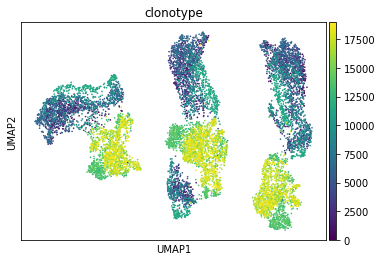

In [19]:
sc.tl.umap(latent_moe)
sc.pl.umap(latent_moe, color='clonotype')

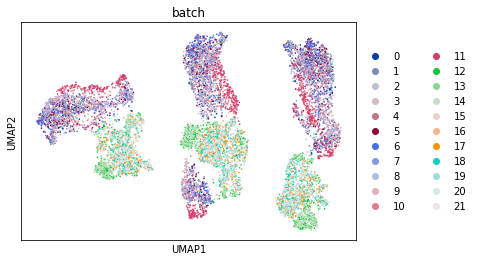

In [21]:
sc.pl.umap(latent_moe, color='batch')